# Efecto del tamaño de la muestra en la validación cruzada

En el notebook anterior presentamos el framework de la validación cruzada y cómo evaluar si un modelo predictivo está subajustando, sobreajustando o generalizando correctamente.

Además de estos aspectos, también es importante comprender cómo el número de muestras disponibles influye en los distintos errores del modelo.

En este notebook, mostraremos este aspecto analizando la variabilidad de los diferentes errores.

Primero, carguemos los datos y creemos el mismo modelo que en el notebook anterior.

In [7]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
data, target = housing.data, housing.target
target *= 100  # rescale the target in k$
data.shape

(20640, 8)

In [2]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

## Curva de aprendizaje

Para comprender el impacto del número de muestras disponibles para el entrenamiento en el rendimiento de generalización de un modelo predictivo, es posible reducir sintéticamente el número de muestras utilizadas para entrenar el modelo predictivo y comprobar los errores de entrenamiento y prueba.

Por lo tanto, podemos variar el número de muestras en el conjunto de entrenamiento y repetir el experimento. Los resultados de entrenamiento y prueba se pueden graficar de forma similar a la curva de validación, pero en lugar de variar un hiperparámetro, variamos el número de muestras de entrenamiento. Esta curva se denomina **curva de aprendizaje**.

Indica el beneficio de añadir nuevas muestras de entrenamiento para mejorar el rendimiento de generalización de un modelo.

Calculemos la curva de aprendizaje de un árbol de decisión y varíemos la proporción del conjunto de entrenamiento del 10 % al 100 %.

In [4]:
import numpy as np

train_sizes = np.linspace(start=0.1,stop=1.0, num=5, endpoint=True)
train_sizes

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

Usaremos `ShuffleSplit` en la validación cruzada.

In [5]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2)

Ahora tenemos todo para el experimento.

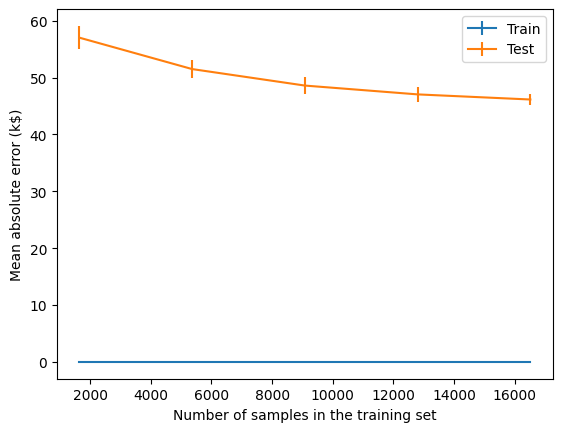

In [8]:
from sklearn.model_selection import LearningCurveDisplay
from matplotlib import pyplot as plt
display = LearningCurveDisplay.from_estimator(regressor,data,target,train_sizes=train_sizes,cv=cv,
                                              score_type="both",  # both train and test errors
                                              scoring="neg_mean_absolute_error",
                                              negate_score=True,  # to use when metric starts with "neg_"
                                              score_name="Mean absolute error (k$)",
                                              std_display_style="errorbar", n_jobs=2,)
#display.ax_.set(xscale="log", title="Learning curve for decision tree")
plt.show()

Del gráfico anterior, si observamos los errores de entrenamiento, podemos ver que obtenemos un error de cero (0k$). Esto significa claramente que el modelo presenta sobreajustre sobre los datos de entrenamiento.

Revisando el error de prueba, podemos ver que a medida que incrementamos las muestras para el entrenamiento, el error de prueba disminuye.

Además, estamos interesados en buscar el punto en el que no es posible disminuir más el error de prueba aunque agreguemos más datos al conjunto de entrenamiento. A este punto se le conoce como el **la tasa de error de Bayes**, el cual indica que no importa que agregamos más datos para el entrenamiento, el modelo no mostrará disminución en el error de prueba. En este caso, utilizar un modelo más complejo sería una opción para intentar reducir el error de prueba.

## Resumen
En este notebook vimos:


*   La influencia del número de muestras en un conjunto de datos, especialmente en la variabilidad de los errores reportados al ejecutar la validación cruzada
*   La curva de aprendizaje, que es una representación visual de la capacidad de un modelo para mejorar al agregar nuevas muestras


